In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [34]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [7]:
y.shape, tx.shape

((10000,), (10000, 2))

In [8]:
print(tx)

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [91]:
def calculate_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)


def calculate_mae(e):
    """Calculate the mae for vector e."""
    return np.mean(np.abs(e))


def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    return calculate_mse(e)

# 2 Grid Search

Fill in the function `grid_search()` below:

In [11]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, w_0 in enumerate(w0):
        for j, w_1 in enumerate(w1):
            
            w = [w_0, w_1]
            
            losses[i,j] = compute_loss(y, tx, w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.015 seconds


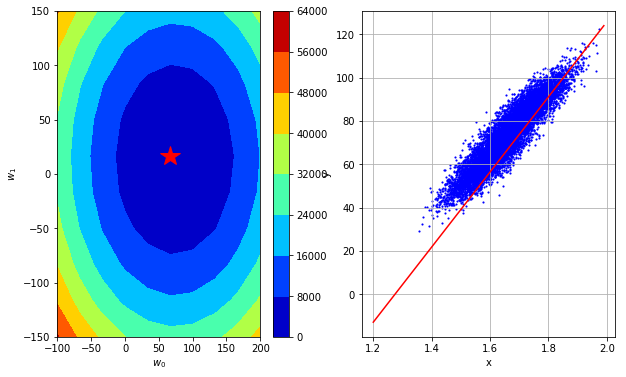

In [12]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [13]:
#works
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    
    gradErr = y - np.dot(tx, w)
    return - np.dot(tx.T, gradErr) / len(y)

In [14]:
g1 = compute_gradient(y, tx, [100, 20])
g2 = compute_gradient(y, tx, [50, 10])
g3 = compute_gradient(y, tx, [w0_star, w1_star])
print(g1, "\n\n", g2, "\n\n", g3)



[26.706078    6.52028757] 

 [-23.293922    -3.47971243] 

 [-6.62725534  3.18695423]


Please fill in the functions `gradient_descent` below:

In [15]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [31]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
#gamma = 0.001
#gamma = 0.01
#gamma = 0.5
gamma = 0.7
#gamma = 1 --> really fast convergency
#gamma = 2 --> ping pong
#gamma = 2.5 --> diverge
# Initialization
w_initial = np.array([100, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=8229.746538099485, w0=81.30574540147369, w1=39.435798704492264
Gradient Descent(1/49): loss=768.6795043502204, w0=75.69746902191575, w1=21.266538315840027
Gradient Descent(2/49): loss=97.18347131278962, w0=74.01498610804836, w1=15.815760199244322
Gradient Descent(3/49): loss=36.74882833942048, w0=73.51024123388814, w1=14.180526764265633
Gradient Descent(4/49): loss=31.309710471817358, w0=73.35881777164008, w1=13.689956733772023
Gradient Descent(5/49): loss=30.82018986373307, w0=73.31339073296566, w1=13.542785724623942
Gradient Descent(6/49): loss=30.776133009005488, w0=73.29976262136333, w1=13.498634421879517
Gradient Descent(7/49): loss=30.772167892080002, w0=73.29567418788263, w1=13.485389031056188
Gradient Descent(8/49): loss=30.771811031556712, w0=73.29444765783842, w1=13.48141541380919
Gradient Descent(9/49): loss=30.771778914109618, w0=73.29407969882516, w1=13.480223328635091
Gradient Descent(10/49): loss=30.771776023539378, w0=73.29396931112117, w1=1

In [32]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [37]:
for y_minibatch, tx_minibatch in batch_iter(y, tx, 10):
    
    print(y_minibatch, "\n\n", tx_minibatch)

[67.87973698 89.61445458 83.2313812  58.76995434 80.10053731 66.13351453
 81.61634971 70.6291187  62.46906844 72.69084745] 

 [[ 1.         -1.19408289]
 [ 1.          1.1610616 ]
 [ 1.          0.44639384]
 [ 1.         -0.87894052]
 [ 1.          0.21396718]
 [ 1.         -0.33656887]
 [ 1.         -0.00712717]
 [ 1.         -0.12865106]
 [ 1.         -0.50356262]
 [ 1.         -0.133348  ]]


In [38]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    gradErr = y - np.dot(tx, w)
    return - np.dot(tx.T, gradErr) / len(y)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for y_minibatch, tx_minibatch in batch_iter(y, tx, batch_size=batch_size, num_batch=1):
            
                gradient = compute_stoch_gradient(y_minibatch, tx_minibatch, w)
                loss = compute_loss(y, tx, w)
                
                w = w - gamma * gradient
                # store w and loss
                ws.append(w)
                losses.append(loss)
                print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                      bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [46]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
#gamma = 0.001
gamma = 0.15
#gamma = 0.5
#gamma = 0.7
#gamma = 1 
#gamma = 2 
#gamma = 2.5
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=5584.473425518335, w0=11.423580318963808, w1=5.132769162601245
Stochastic Gradient Descent(1/49): loss=3928.3824177187794, w0=20.796826273518885, w1=0.15747908812402134
Stochastic Gradient Descent(2/49): loss=2964.198737022334, w0=24.737783402957447, w1=-7.244679664150859
Stochastic Gradient Descent(3/49): loss=2817.970799276194, w0=30.058110489231275, w1=-10.656811175345702
Stochastic Gradient Descent(4/49): loss=2482.6789449066637, w0=29.42535908721002, w1=-9.418643346932855
Stochastic Gradient Descent(5/49): loss=2479.5572854712486, w0=30.507027708629025, w1=-11.2345789483436
Stochastic Gradient Descent(6/49): loss=2472.2862975990297, w0=39.50724931039353, w1=-3.4624681350802415
Stochastic Gradient Descent(7/49): loss=1459.3485097833452, w0=42.18117580675981, w1=-5.806394431210557
Stochastic Gradient Descent(8/49): loss=1370.728669608107, w0=51.294428200055876, w1=5.923183849035845
Stochastic Gradient Descent(9/49): loss=571.8506275543925, w0=

In [47]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

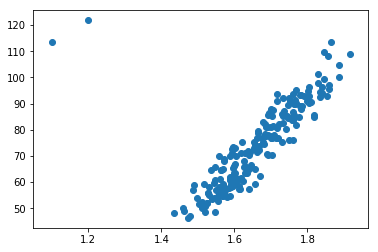

In [85]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight)




In [ ]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
#gamma = 0.001
#gamma = 0.01
#gamma = 0.5
gamma = 0.7
#gamma = 1 --> really fast convergency
#gamma = 2 --> ping pong
#gamma = 2.5 --> diverge
# Initialization
w_initial = np.array([100, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

In [86]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [58]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    abs_err = np.abs(y - np.dot(tx,w))

    return np.mean(abs_err)

In [96]:
def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    
    gradErr = y - np.dot(tx, w)
    g_grad = np.mean(np.dot(tx.T, gradErr))
    
    if gradErr < 0: 
        return - g_grad
    elif gradErr > 0:
        return g_grad
    else: 
        return np.random.uniform(-1, 1) * g_grad
        

In [97]:
print(compute_subgradient(y, tx, np.array([50, 50])))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [92]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_subgradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [93]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
#gamma = 0.001
#gamma = 0.01
#gamma = 0.5
gamma = 0.7
#gamma = 1 --> really fast convergency
#gamma = 2 --> ping pong
#gamma = 2.5 --> diverge
# Initialization
w_initial = np.array([100, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))